#  Matplotlib
 

## Matplotlibとは

- Pythonでデータ可視化を行うグラフ描画ライブラリ。

- グラフを画像ファイルとして保存できる。

- 科学計算言語のMATLABのグラフ描画機能と似ている。


## 基本的な使い方

1行目はマジックコマンド。この命令でグラフがnotebook上に表示される。


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

2直線(0, 0)-(1, 1) と (0, 1)-(1, 0) を描画する。

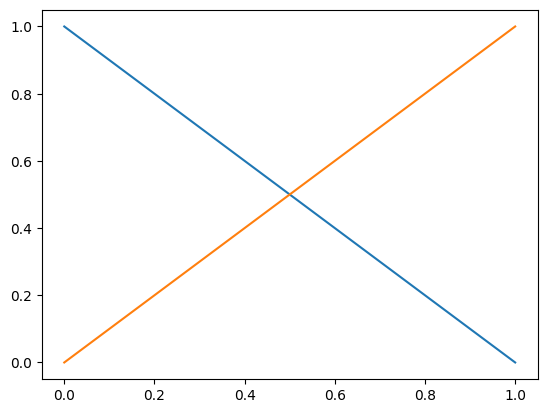

In [2]:
plt.plot([1,0])
plt.plot([0,1])

グラフのスタイルを変更するには plt.style.use() を使う

引数として指定可能なスタイルは plt.style.available 属性に入っている。

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

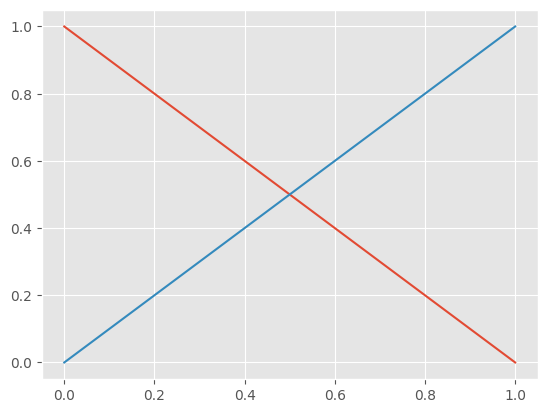

In [4]:
plt.style.use('ggplot')
plt.plot([1,0])
plt.plot([0,1])

In [5]:
# デフォルトに戻す
plt.style.use('default')

## 色々なグラフ

### 折れ線グラフ

- .plot()
  - (名前付きを除いて)引数が1個：第1引数が y 座標値のリスト。x 座標値は[0, 1, 2, ...]
  - (名前付きを除いて)引数が2個：第1引数が x 座標値のリスト、第2引数が y 座標値のリスト

座標値のリストとしては、Python 標準のリスト、タプル、Numpy の ndarray、Pandas の Series などが使用可。

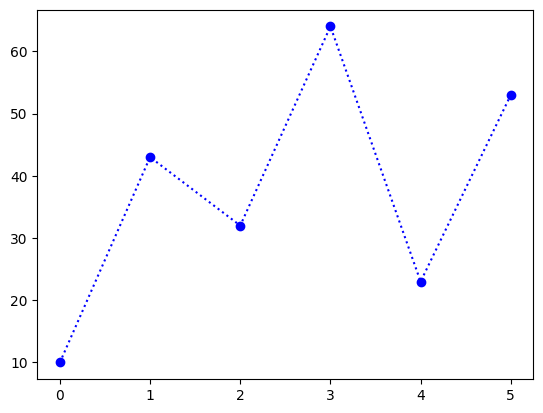

In [6]:
data = [10,43,32,64,23,53]
plt.plot(data,c='b',marker='o',linestyle=':')


カラーコード

|記号 |説明|
|:---:|:----|
| b | 青(blue) |
| g | 緑(green)|
| r | 赤(red) |
| c | シアン(cyan)|
| m | マゼンタ( magenta)|
| y | 黄( yellow)|
| k | 黒(black)|
| w | 白(white)|


主なmarker

|記号 |説明|
|:---:|:----|
| . | 点|
| o | 円|
| x | ×印|
| ^ | 三角形(上向)|
| v | 三角形(下向)|

主なlinestyle

|記号 |説明|
|:---:|:----|
| - | 実線 |
| -- | 破線 |
| -. | 長短の線 |
| : | 点線 |

###  複数のグラフを描画する
複数のグラフを描画するには以下の手順による。

1. グラフ描画の基礎となる Figure オブジェクトを plt.figure() で取得
2. Figure オブジェクトの add_subplot() メソッドで、Axis オブジェクトを作成
3. Axis オブジェクトに対し、plt オブジェクトと同様に描画メソッドを実行

plt.figure() の引数として figsize=(x, y) (x, y は任意の整数)を指定すると、複数グラフ全体の大きさを制御できる。

add_subplot() の引数は、   
    add_subplot(行数, 列数, そのうちの何番目) 、または add_subplot(3桁の数)

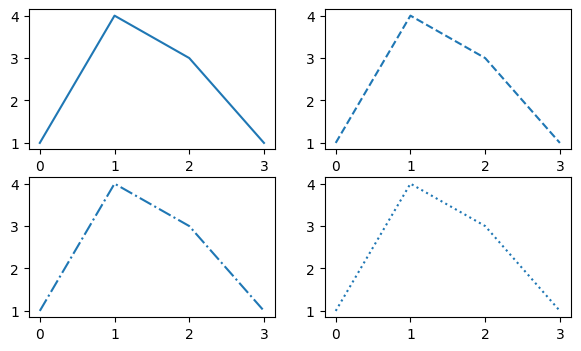

In [7]:
fig = plt.figure(figsize=(7,4))

axis = [
    fig.add_subplot(2, 2, 1),   # fig.add_subplot(221) と書くことも可
    fig.add_subplot(2, 2, 2),
    fig.add_subplot(2, 2, 3),
    fig.add_subplot(2, 2, 4),
]

data = [1,4,3,1]

linestyles = ['-','--','-.',':']

for l, ax, i in zip(linestyles, axis, [1,2,3,4]):
    ax.plot(data,linestyle=l)


(参考) 複数のグラフを作る別の方法
- plt.subplots()  
  Figure オブジェクトと Axis オブジェクト(が入った2次元の Numpy ndarray)を返す。  
  引数はグラフの行数、列数、figsize=  など

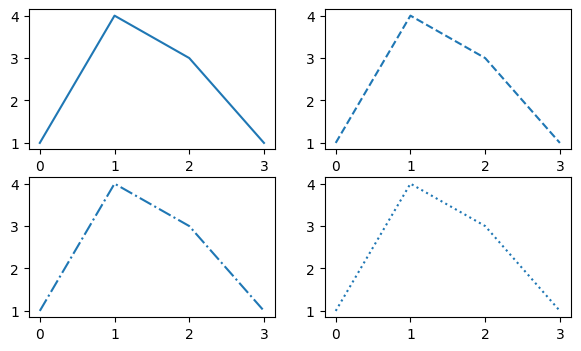

In [8]:
fig, axis = plt.subplots(2, 2, figsize=(7,4)) # Figure と Axis(2次元のndarray)

data = [1,4,3,1]

linestyles = ['-','--','-.',':']

for l, ax, i in zip(linestyles, axis.flatten(), [1,2,3,4]):
    ax.plot(data,linestyle=l)


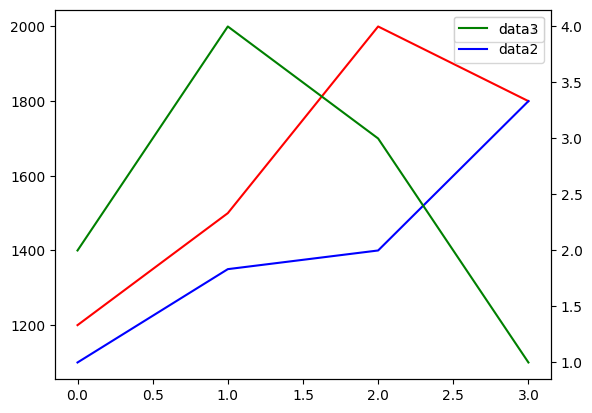

In [9]:
# axes を使う場合

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

ax1.plot([1200,1500,2000,1800],label='data1',c='r')
ax1.plot( [1100,1350,1400,1800], label='data2',c='b')
ax1.legend()
ax2 = ax1.twinx() #軸を分けるために、別の ax を作成

ax2.plot([2,4,3,1],label='data3',c='g')
ax2.legend()

plt.show()

### 凡例を表示する
- .legend()  
loc= で表示位置を変えることができる。

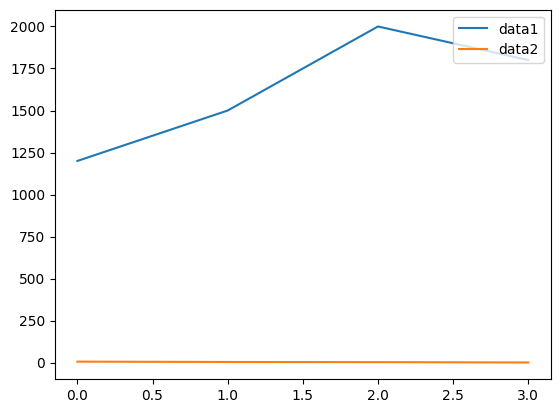

In [10]:
plt.plot( [1200,1500,2000,1800],label='data1')
plt.plot( [6,4,3,1],label='data2')
plt.legend(loc=1)

### スケールが異なるデータを表示する

- .twinx() で新しい座標系(Axis オブジェクト)を作る。

(注意)
subplot 内では、.twinx() の後は .twinx() の戻り値の Axis オブジェクトに対し描画する。

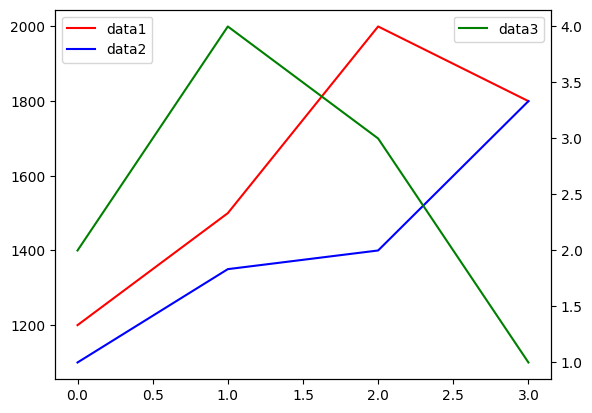

In [11]:
plt.plot([1200,1500,2000,1800],label='data1',c='r')
plt.plot( [1100,1350,1400,1800], label='data2',c='b')
plt.legend(loc=2)
plt.twinx() #軸を分ける

plt.plot([2,4,3,1],label='data3',c='g')
plt.legend(loc=1)

### 散布図
- .scatter()  
引数は、x座標、y座標。色、マーカーなどの指定は .plot() と同じ

[[38 13 73 10 76  6 80 65 17  2 77 72  7 26 51 21 19 85 12 29 30 15 51 69
  88 88 95 97 87 14 10  8 64 62 23 58  2  1 61 82  9 89 14 48 73 31 72  4
  71 22 50 58  4 69 25 44 77 27 53 81 42 83 16 65 69 26 99 88  8 27 26 23
  10 68 24 28 38 58 84 39  9 33 35 11 24 16 88 26 72 93 75 63 47 33 89 24
  56 66 78  4]
 [ 1 78  7 53 86 71  3 77 92 22 76  8 78 73 76 77 44 21 31 37  8 46 69 58
  83 97 14 11 24 82  8 25 75 93 21 33 13 66 95 61 25 83 98  3 93 99 11 55
  97 83 87 71 67 72 49 55 16  6 18 43 21 49 23 14 98 54 85 11 97 56 62 57
  90 22 97 84 26 15 14 85 44  7 78 57 60 16 25 10 67 72 54 70 37 22 41 78
  92 50 48 78]]


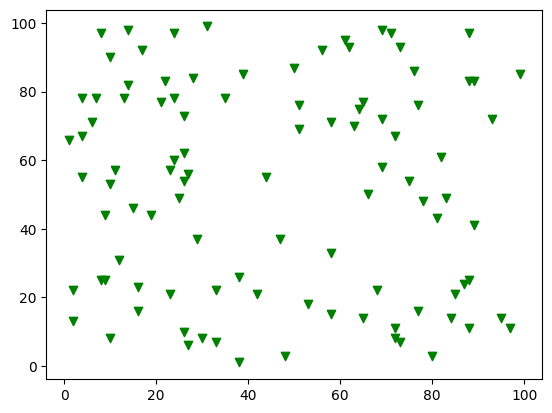

In [12]:
np.random.seed(1)
x = np.random.randint(1,100,(2,100))
print(x)
plt.scatter(x[0],x[1],c='g',marker='v') #色、マーカーの指定は折れ線グラフと同じ

#### 複数のデータを描画する


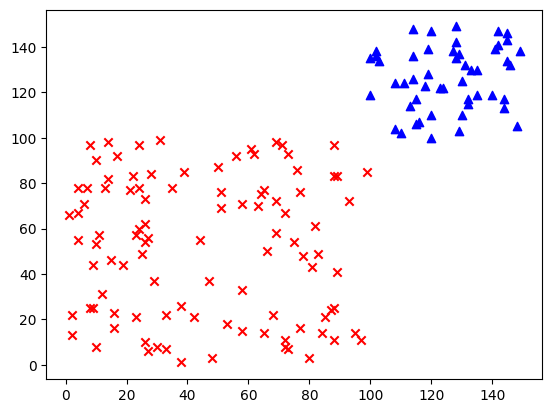

In [13]:
np.random.seed(1)
data1 = np.random.randint(1,100,(2,100))
data2 = np.random.randint(100,150,(2,50))
plt.scatter(data1[0],data1[1] , color='r',marker='x')
plt.scatter(data2[0],data2[1] , c='b',marker='^')

### 棒グラフ
- .bar()  
色の指定に color= しか使えない。

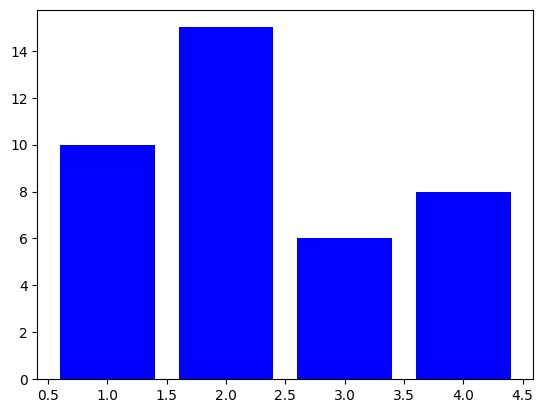

In [14]:
x = range(1,5)
y = [10,15,6,8]
plt.bar(x,y, color='b')  #c=    「matplotlib の仕様で使えない」
plt.show()

### 横向き棒グラフ
- hbar()

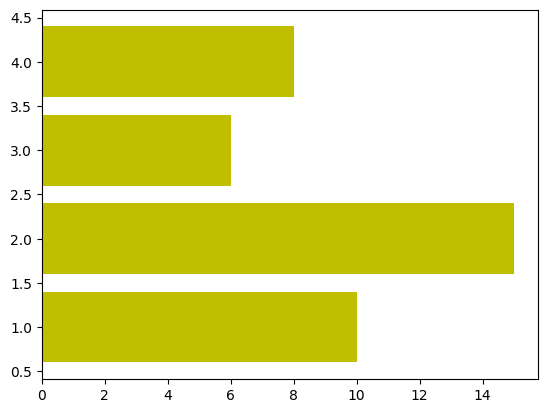

In [15]:
import matplotlib.pyplot as plt

x = range(1,5)
y = [10,15,6,8]
plt.barh(x,y,color='y') #c=は使えない
plt.show()

#### 複数グループの棒グラフ
普通に .bar() を複数回使用するとすべての棒グラフが重なってしまうので、
- Numpy ndarray の ブロードキャストを使って、x 座標値をずらす
- width= で幅を変える

のがポイント。

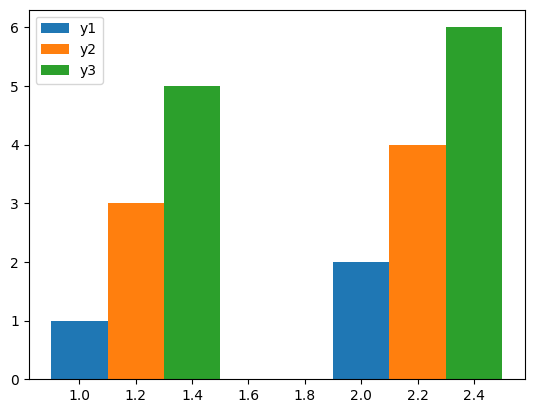

In [16]:
import matplotlib.pyplot as plt

x = [1,2] # [1.2,2.2]   [1.4,2.4]
y1,y2,y3 = [1,2],[3,4],[5,6]

plt.bar(x,y1,label='y1',width=0.2)
plt.bar(np.array(x)+0.2, y2,label='y2',width=0.2)
plt.bar(np.array(x)+0.4, y3,label='y3',width=0.2)

plt.legend()
plt.show()

#### 積み上げ棒グラフ
bottom= を指定。

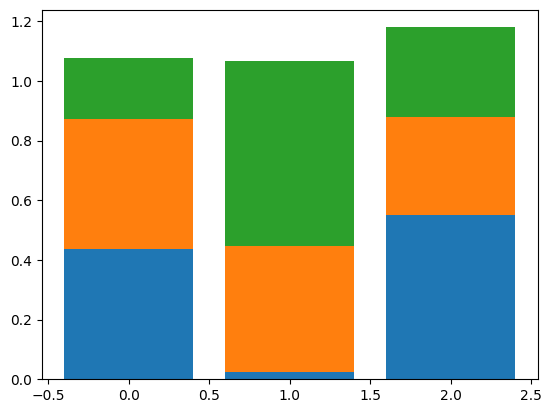

In [17]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(3)
np.random.seed(2)
y = np.random.rand(9).reshape((3,3))

y1,y2,y3 = y


plt.bar(x,y1, label='y1')
plt.bar(x,y2,bottom=y1, label='y2')
plt.bar(x,y3,bottom=y1+y2, label='y3')

plt.show()


### ヒストグラム
- .hist()

　平均５０，標準偏差２０の乱数を100万個発生させたデータをヒストグラムに表示。


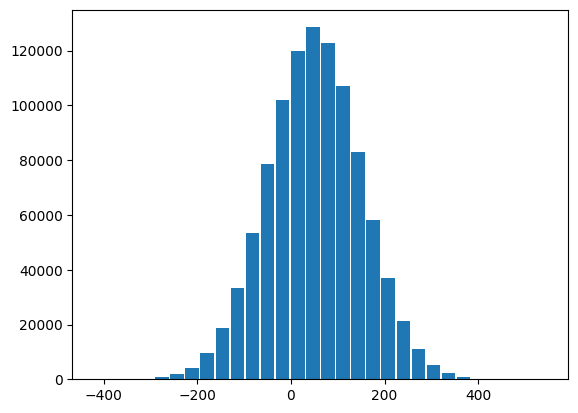

In [18]:
import matplotlib.pyplot as plt

import numpy as np
y = np.random.normal(50,100,1000000)
plt.hist(y,bins=30,rwidth=0.9) # bins が度数の数
plt.show()

### 円グラフ
- .pie()

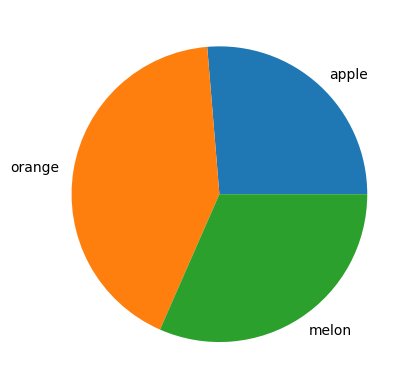

In [19]:
import matplotlib.pyplot as plt

labels = ['apple','orange','melon']
data = [25,40,30]
plt.pie(data,labels=labels)
plt.show()